# Imports (do NOT change/add)

In [5]:
from random import random, seed, gauss
from math import sqrt, cos, sin, log, pi
from numpy.random import multivariate_normal
from numpy.linalg import cholesky

import matplotlib.pyplot as plt
%matplotlib inline

# Constants (do NOT change/add)

In [6]:
rseed = 8675309
N = 10000

# initialize the RNG
seed(rseed)

# 1. Basic Stats
* Implement the mean and covariance functions

In [7]:
# input a list, output the mean
def mean(l):
    if len(l) == 0:
        return 0
    return sum(l)/len(l)

    
def mean_test(l, expected):
    print("mean({})={:.5f}, expected={:.5f}".format(str(l), mean(l), expected))
    
mean_test([], 0)
mean_test([1], 1)
mean_test([1, 2, 3], 2)
mean_test([1, 2, 3, 4], 2.5)
mean_test([0.607, 0.094, 0.314, 0.491, 0.664, 0.282, 0.914, 0.517, 0.731, 0.804], 0.5418)

mean([])=0.00000, expected=0.00000
mean([1])=1.00000, expected=1.00000
mean([1, 2, 3])=2.00000, expected=2.00000
mean([1, 2, 3, 4])=2.50000, expected=2.50000
mean([0.607, 0.094, 0.314, 0.491, 0.664, 0.282, 0.914, 0.517, 0.731, 0.804])=0.54180, expected=0.54180


In [8]:
# input two lists, output the sample covariance
# cov(X,Y) = E[XY] - E[X]E[Y]
def scovariance(l1, l2):
    mean_l1 = mean(l1)
    mean_l2 = mean(l2)
    return sum((item1-mean_l1)*(item2-mean_l2) for item1, item2 in zip(l1,l2))/(len(l1) - 1)

# input a list, output the sample variance
# equal to the self-covariance
def svariance(l):
    return scovariance(l,l)

##

def svariance_test(l, expected):
    print("svariance({})={:.5f}, expected={:.5f}".format(str(l), svariance(l), expected))
    
svariance_test([1, 2, 3], 1.)
svariance_test([1, 2, 3, 4], 5./3.)
svariance_test([600, 470, 170, 430, 300], 27130)

##

def scovariance_test(l1, l2, expected):
    print("scovariance({}, {})={:.5f}/{:.5f}, expected={:.5f}".format(str(l1), str(l2), scovariance(l1, l2), scovariance(l2, l1), expected))
    
scovariance_test([2.1, 2.5, 3.6, 4.0], [8, 10, 12, 14], 8./3.)

svariance([1, 2, 3])=1.00000, expected=1.00000
svariance([1, 2, 3, 4])=1.66667, expected=1.66667
svariance([600, 470, 170, 430, 300])=27130.00000, expected=27130.00000
scovariance([2.1, 2.5, 3.6, 4.0], [8, 10, 12, 14])=2.26667/2.26667, expected=2.66667


# 2. Generate Uniform Random Samples
* Generates three lists of N numbers, where each value is i.i.d. in [0,1]
* Respond to the question below

sample1 mean: 0.49878


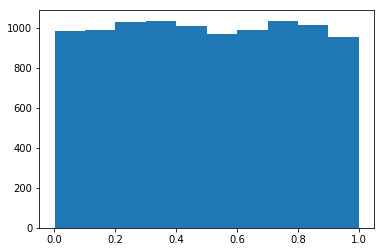

In [9]:
sample1 = [random() for i in range(N)]

plt.hist(sample1)
print("sample1 mean: {:.5f}".format(mean(sample1)))

sample2 mean: 0.50244


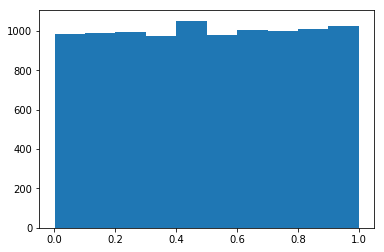

In [10]:
sample2 = [random() for i in range(N)]

plt.hist(sample2)
print("sample2 mean: {:.5f}".format(mean(sample2)))

sample3 mean: 0.50344


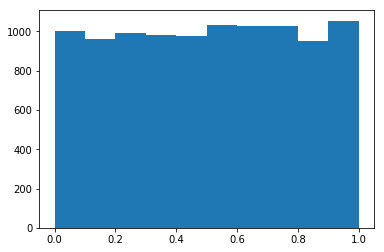

In [11]:
sample3 = [random() for i in range(N)]

plt.hist(sample3)
print("sample3 mean: {:.5f}".format(mean(sample3)))

## Q: Are these "good" samples? How do you know?

The values in the above three samples have almost the same frequencies and hence are equiprobable, which is supposed to be the case with samples from a uniform distribution. They are good samples.

# 3. Inverse Transform Sampling
* Implement the CDF for a given PDF
* Implement the corresponding inverse-CDF

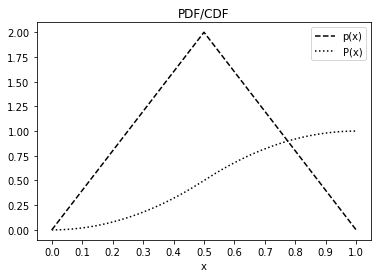

In [13]:
# input x, output p(x) for a function
def p(x): 
    if (x < 0) or (x > 1):
        return 0
    elif x < 0.5:
        return 4*x
    else:
        return -4*x + 4


# input x, output P(x) for p above
# p is PDF, this (P) should be CDF
def P(x): 
    if (x < 0) or (x > 1):
        return 0
    elif x < 0.5:
        return 2*(x**2)
    else:
        return 4*x - 2*x**2 - 1

x = [x/1000. for x in range(0,1001,1)]

plt.plot(x, [p(n) for n in x], 'k--', label = 'p(x)')
plt.plot(x, [P(n) for n in x], 'k:', label = 'P(x)')

plt.xlabel('x')
plt.xticks([t/10. for t in range(0,11,1)])

plt.title('PDF/CDF')
plt.legend(loc=0)

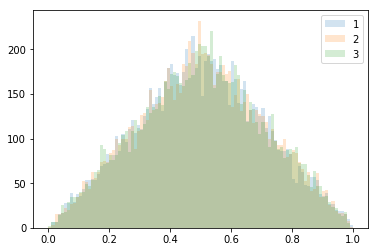

In [14]:
# input y, output x = P^(-1)(y)
# that is, the value of x for which P(x)=y
def invP(x):
    if (x < 0) or (x > 1):
        return 0
    elif x < 0.5:
        return sqrt(x/2.)
    else:
        return 1 - sqrt((1 - x)/2)
        
sampled1 = [invP(n) for n in sample1]
sampled2 = [invP(n) for n in sample2]
sampled3 = [invP(n) for n in sample3]

bins = [x/100. for x in range(0,101,1)]

plt.hist(sampled1, label='1', alpha=0.2, bins=bins)
plt.hist(sampled2, label='2', alpha=0.2, bins=bins)
plt.hist(sampled3, label='3', alpha=0.2, bins=bins)
plt.legend(loc='upper right')

# 4. Generate Normally Distributed Numbers via Box–Muller
* Implement the Box-Muller transform
* Implement function to shift/scale normally distributed values

In [15]:
# input two uniformly random values in [0,1]
# output two values as (y1, y2) that are normally distributed with mean=0, variance=1: N(0,1)
# using the Box-Muller transformation
def normalpair(x1, x2):
    y1 = sqrt(-2 * log(x1)) * cos(2 * pi * x2)
    y2 = sqrt(-2 * log(x1)) * sin(2 * pi * x2)
    return (y1, y2)

# input value in N(0,1)
# output corresponding value in N(mu, variance)
# basically: mean + (std. dev.)*x
def scalenormal(x, mu, variance):
    return mu + sqrt(variance) * x
    

Gaussian 1: mean=0.98692, variance=25.08427
Gaussian 2: mean=29.99661, variance=3.98527


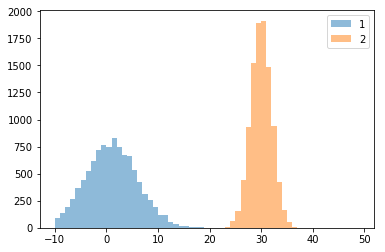

In [16]:
mymean1 = 1
myvariance1 = 25

mymean2 = 30
myvariance2 = 4

bins=range(-10, 50, 1)

mygaussians = [normalpair(x1, x2) for x1,x2 in zip(sample1, sample2)]
mygaussian1 = [scalenormal(x[0], mymean1, myvariance1) for x in mygaussians]
mygaussian2 = [scalenormal(x[1], mymean2, myvariance2) for x in mygaussians]

plt.hist(mygaussian1, label='1', alpha=0.5, bins=bins)
plt.hist(mygaussian2, label='2', alpha=0.5, bins=bins)
plt.legend(loc='upper right')

print("Gaussian 1: mean={:.5f}, variance={:.5f}".format(mean(mygaussian1), svariance(mygaussian1)))
print("Gaussian 2: mean={:.5f}, variance={:.5f}".format(mean(mygaussian2), svariance(mygaussian2)))

Python Gaussian1: mean=0.9626797664670734, variance=24.81399842067043


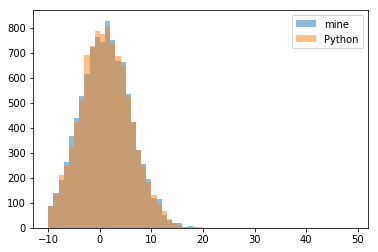

In [17]:
pythonG1 = [gauss(mymean1, sqrt(myvariance1)) for x in range(N)]

plt.hist(mygaussian1, label='mine', alpha=0.5, bins=bins)
plt.hist(pythonG1, label='Python', alpha=0.5, bins=bins)
plt.legend(loc='upper right')

print("Python Gaussian1: mean={}, variance={}".format(mean(pythonG1), svariance(pythonG1)))

Python Gaussian2: mean=29.981038509019378, variance=4.004938950448199


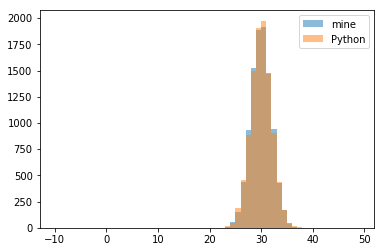

In [18]:
pythonG2 = [gauss(mymean2, sqrt(myvariance2)) for x in range(N)]

plt.hist(mygaussian2, label='mine', alpha=0.5, bins=bins)
plt.hist(pythonG2, label='Python', alpha=0.5, bins=bins)
plt.legend(loc='upper right')

print("Python Gaussian2: mean={}, variance={}".format(mean(pythonG2), svariance(pythonG2)))

# 5. Sampling a 1D Gaussian Mixture Model
* Implement the function to sample a 1D 2-Gaussian mixture model
* Respond to the question below

In [19]:
# Inputs: (u,g1,g2) assumed to be the same length
#  responsibility1 = probability split for gaussian 1 (2 = 1-reponsibility1)
#  u = list of values uniformly in [0,1]
#  g1 = list of values in N(mean1, variance1)
#  g2 = list of values in N(mean2, variance2)
# 
# Output: list of values (length=len(u)) sampled from the GMM(g1, g2)
def samplemm(responsibility1, u, g1, g2):
    mm_vals = []
    for i, uni_num in enumerate(u):
        if uni_num < responsibility1:
            mm_vals.append(g1[i])
        else:
            mm_vals.append(g2[i])
    return mm_vals

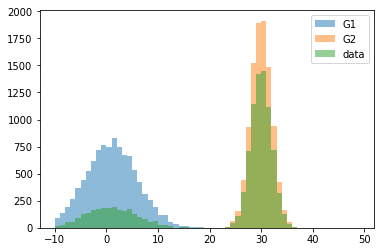

In [20]:
split = 0.25

plt.hist(mygaussian1, label='G1', alpha=0.5, bins=bins)
plt.hist(mygaussian2, label='G2', alpha=0.5, bins=bins)
plt.hist(samplemm(split, sample3, mygaussian1, mygaussian2), label='data', alpha=0.5, bins=bins)
plt.legend(loc='upper right')

## Q: As you change the split variable, what happens to the resulting distribution? What are extreme values and what happens at these extremes?

The split variable decides how much of the each input gaussian distributions, the output distribution would sample. As split is increased, the sampling from G2 increases and G1 decreases, and vice versa.

1. split = 0.0: Sample distribution is identical to G2
2. split = 1.0: Sample distribution is identical to G1
    

# 6. Generate a 2D Gaussian Distribution
* Implement function to generate a 2D Gaussian given two sets of uniformly random values in [0,1]

In [21]:
twod_means = [10,20]
twod_cov = [[1000, -144], [-144, 36]]

Python Gaussian mean: (10.107153607663129, 20.024059353602766)
Python Gaussian cov: x=987.2758159938794, y=35.72185001558955 xy=-142.19711906497398


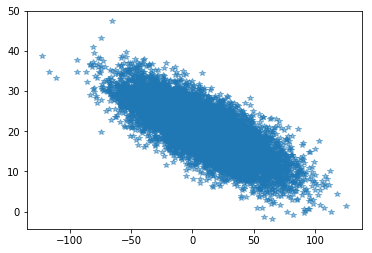

In [25]:
data = multivariate_normal(twod_means, twod_cov, N)
px = list(data[:,0])
py = list(data[:,1])

plt.plot(px, py, '*', alpha=0.5)

print("Python Gaussian mean: ({}, {})".format(mean(px), mean(py)))
print("Python Gaussian cov: x={}, y={} xy={}".format(scovariance(px,px), scovariance(py,py), scovariance(px,py)))

My Gaussian mean: (9.917252684970098, 20.005288321150953)
My Gaussian cov: x=1003.3707530613519, y=36.32920648452902 xy=-145.58093473979082


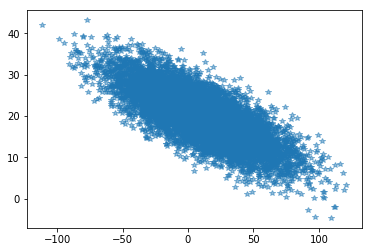

In [24]:
# Inputs: (u1,u2) assumed to be same length
#  u1 = list of values in uniform [0,1]
#  u2 = list of values in uniform [0,1]
#  mu_x = mean in x
#  mu_y = mean in y
#  cov = covariance matrix for (x,y)
# 
# Output: list of coordinates [(x1, y1), (x2, y2), ... (xn, yn)] where n=len(u1)
#         that are distributed in N((mu_x, mu_y), cov)
# 
# Notes:
#  - you already converted from U[0,1] to N(0,1) above
#  - now each dimension needs to be shifted/scaled...
#    * mean + (L * [x y]^T)
#    * L is the equivalent to "standard deviation" of covariance: L^T * L = covariance
#    * There are many ways to produce such an L, use the cholesky decomposition here
def g2d_sample(u1, u2, mu_x, mu_y, cov):
    samples = []
    L = cholesky(cov)
    
    for u_1, u_2 in zip(u1, u2):
        g1, g2 = normalpair(u_1, u_2)
        x_out = mu_x + (L[0][0] * g1 + L[0][1] * g2)
        y_out = mu_y + (L[1][0] * g1 + L[1][1] * g2)
        samples.append((x_out, y_out))
    return samples


data = g2d_sample(sample1, sample2, twod_means[0], twod_means[1], twod_cov)
myx = [x[0] for x in data]
myy = [x[1] for x in data]

plt.plot(myx, myy, '*', alpha=0.5)

print("My Gaussian mean: ({}, {})".format(mean(myx), mean(myy)))
print("My Gaussian cov: x={}, y={} xy={}".format(scovariance(myx,myx), scovariance(myy,myy), scovariance(myx,myy)))

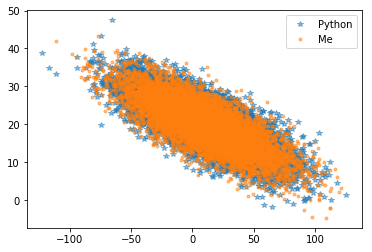

In [26]:
plt.plot(px, py, '*', alpha=0.5, label="Python")
plt.plot(myx, myy, '.', alpha=0.5, label="Me")
plt.legend(loc='upper right')

# Fin